In [1]:
#Importing the libraries 
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import StratifiedKFold 
import matplotlib as plt
from sklearn.model_selection import ShuffleSplit

C:\Users\admin\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Take the training and testing data csv file
data =  pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print 'Test and Train files loaded'
data.head(4)

Test and Train files loaded


,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#Dimensions of Data and Test file
print "Data shape: %s"%(str(data.shape))
print "Test shape: %s"%(str(test.shape))
cols = data.columns.values#.values converts into numpy array

Data shape: (3751, 1777)
Test shape: (2501, 1776)


In [4]:
#Check Statistics of Data
'''1)Entire data is numeric in nature. Skewness still remains after applying np.log to dataframe'''
print data.skew().values
for i in range(1, len(data.columns.values)):
    frame = data[cols[i]].loc[data[cols[i]]<0]
print frame
print 'No negative values are present in frame'
#Seperate the data into features and response
X = data.iloc[:,1:]
y = data.iloc[:,0].values
shift = 0.0001
sk = X
sk = sk + shift
sk = sk.apply(np.log, axis=0)

[-0.1696963   3.19642628  0.16967415 ...,  9.07346175  6.81271317
  9.2946186 ]
Series([], Name: D1776, dtype: int64)
No negative values are present in frame


In [5]:
data.describe()
import seaborn as sns
from sklearn.decomposition import PCA
pcad = PCA(n_components = 4)
pcad.fit(X)
d = pcad.transform(X)
print d
d = pd.DataFrame(d)
sns.heatmap(d.corr(), annot=True)


[[-3.08937495  1.12591252 -0.18780156  2.88569054]
 [ 7.02504203  4.79479822  7.95792434  0.0828    ]
 [-3.20024716  1.47203377  0.21369314  1.11451401]
 ..., 
 [ 2.94241062  1.9662958  -0.69285997 -2.58032477]
 [-2.92376475  1.33064814  0.07933475 -0.97505895]
 [-3.74088418  2.56984461 -0.45617526 -2.25019277]]


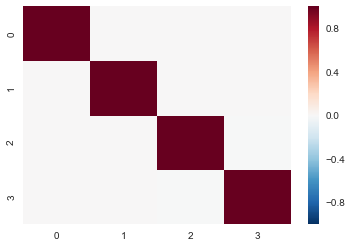

In [6]:
%matplotlib inline
sns.heatmap(d.corr())
#No high correlation found between the all the feature variables.

In [7]:
#check if skew still remains in feature columns
sk=X.skew().values
print sk
#Skew has reduced but still present.
X = X.values

[ 3.19642628  0.16967415  1.95964542 ...,  9.07346175  6.81271317
  9.2946186 ]


In [8]:
#Checking Dimensions of features(train) and response(label)
print 'checking type of features: %s'%(str(type(X)))
print 'checking type of response: %s'%(str(type(y)))
print 'Test dimensions is : %s'%(str(test.shape))
print 'features dimensions is:%s'%(str(X.shape))


checking type of features: <type 'numpy.ndarray'>
checking type of response: <type 'numpy.ndarray'>
Test dimensions is : (2501, 1776)
features dimensions is:(3751L, 1776L)


In [9]:
#this cell searches over exhaustive parameters so we can decide which models to use during ensemble.
#GradientBossting classifier takes almost half an hour to run same goes for each classifier if n_estimators =100
#However, the score on private leaderboard increases if n_estimators is changed to 100. 
#I avoided it due to large time consuming process
from sklearn.metrics import log_loss
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
clfs = [RandomForestClassifier(n_estimators=100, n_jobs=-1, criterion='gini'),
            RandomForestClassifier(n_estimators=100, n_jobs=-1, criterion='entropy'),
            ExtraTreesClassifier(n_estimators=100, n_jobs=-1, criterion='gini'),
            ExtraTreesClassifier(n_estimators=100, n_jobs=-1, criterion='entropy'),
            GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=6, n_estimators=100)]
r = RandomForestClassifier()
param = {'n_estimators':[50,100,200], 'criterion':['gini','entropy']}
scorer = make_scorer(log_loss)
g1 = GridSearchCV(estimator = r,param_grid = param, scoring = scorer,cv =5)
g1.fit(X,y)
print g1.best_estimator_
print '---------------------------------------------------------------------------------------------------------------------------'

e = ExtraTreesClassifier()
param = {'n_estimators': [50,100,200],'criterion':['gini','entropy']}
scorer = make_scorer(log_loss)
g2 = GridSearchCV(estimator = e,param_grid = param, scoring = scorer,cv =5)
g2.fit(X,y)
print g2.best_estimator_
print '---------------------------------------------------------------------------------------------------------------------------'

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
---------------------------------------------------------------------------------------------------------------------------
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
----------------------------------------------------------------------------------------------------------------

In [10]:
#lets keep the classifier list since GridSearchCV on RandomForest does not give much deviation in selection of classifiers
#StratifiedKFold generates crossvalidation indices of form(train, cv_indices)
#we use k=10(10 pairs of (train,cv_indices) are obtained
n_folds = 10                                      
skf = StratifiedKFold(y, n_folds, shuffle = False, random_state = 14)
for i in skf:
    print i

(array([ 359,  361,  363, ..., 3748, 3749, 3750]), array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 1

In [11]:
from sklearn.linear_model import LogisticRegression
#We pass X and y as numpyarray
def stacking(X,y,clfs,test):
    '''Inputs: X:numpy array of features of training set excluding label or response or target
               y:numpy array of labels or response or target
               clfs: classifier list 
               test: test set without labels and only features set
       Output:List of [blend_train:metafeatures, blend_test:meta predictions of test, y:label, test:test'''
    
    clf_length = (len(clfs))
    x_rows = (X.shape[0])
    test_rows = int(test.shape[0])
    blend_train = np.zeros((x_rows,clf_length))#construct a 2d list containing rows=len of X and no of columns=len(classifier list) 
    blend_test = np.zeros((test_rows,clf_length),dtype = float)#construct a 2d list containing rows = len of test and no of columns = len(classifier list)
    
    a=['rf1','rf2','et1','et2','gb']
    for i, clf in enumerate(clfs):#iterate over classifiers from list
        blend_test_j = np.zeros((test.shape[0], len(skf)))#we take mean of all entries in each row blend_test_j and store it in blend_test
        print 'classifier: %s'%(a[i])
        for j, (train,cv) in enumerate(skf):
            xtrain = X[train]
            ytrain = y[train]
            xtest = X[cv]
            ytest = y[cv]
            clf.fit(xtrain,ytrain)
            blend_train[cv,i] = clf.predict_proba(xtest)[:,1]#collect meta features(predictions over cross validation indices)
            blend_test_j[:,j] =clf.predict_proba(test)[:,1]#predict the test set and take mean every time once for loop exits.  
            print 'fold= %s'%(str(j)) 
        #print blend_test_j
        blend_test[:,i] = blend_test_j.mean(1)#Calculate mean of each row of predictions. 
    return [blend_train,blend_test,y,test]

In [12]:
stack = stacking(X,y,clfs,test)

classifier: rf1
fold= 0
fold= 1
fold= 2
fold= 3
fold= 4
fold= 5
fold= 6
fold= 7
fold= 8
fold= 9
classifier: rf2
fold= 0
fold= 1
fold= 2
fold= 3
fold= 4
fold= 5
fold= 6
fold= 7
fold= 8
fold= 9
classifier: et1
fold= 0
fold= 1
fold= 2
fold= 3
fold= 4
fold= 5
fold= 6
fold= 7
fold= 8
fold= 9
classifier: et2
fold= 0
fold= 1
fold= 2
fold= 3
fold= 4
fold= 5
fold= 6
fold= 7
fold= 8
fold= 9
classifier: gb
fold= 0
fold= 1
fold= 2
fold= 3
fold= 4
fold= 5
fold= 6
fold= 7
fold= 8
fold= 9


In [13]:
#So, far we have blend_train,y and blend_test
#Now, training is done on bend_train,y and predictions are made on blend_test
blend_train = stack[0]
print blend_train
print 'Shape of blend_train is: %s'%(str(blend_train.shape))

[[ 0.83        0.93        0.78        0.82        0.85050999]
 [ 0.99        0.97        1.          1.          0.89386741]
 [ 0.2         0.23        0.17        0.13        0.13887845]
 ..., 
 [ 0.29        0.34        0.25        0.27        0.15841269]
 [ 0.81        0.86        0.93        0.94        0.90526227]
 [ 0.11        0.11        0.07        0.07        0.06306817]]
Shape of blend_train is: (3751L, 5L)


In [14]:
blend_test = stack[1]
print blend_test
print 'Shape of blend_test is: %s'%(str(blend_test.shape))

[[ 0.845       0.842       0.882       0.888       0.87333902]
 [ 0.85        0.893       0.892       0.915       0.91072151]
 [ 0.564       0.552       0.507       0.533       0.36746697]
 ..., 
 [ 0.934       0.938       0.97        0.979       0.91419125]
 [ 0.635       0.626       0.718       0.713       0.75181095]
 [ 0.283       0.294       0.351       0.362       0.19290892]]
Shape of blend_test is: (2501L, 5L)


In [15]:
#Now, we train on blend_train as meta features on LogisticRegression.You can use SVM too
print 'Blending Procedure'
clf = LogisticRegression()
clf.fit(blend_train, y)

Blending Procedure


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
y_submission = clf.predict_proba(blend_test)[:,1]#save first column or column of your choice in submission
print "Linear stretch of predictions to [0,1]"# we scale the probabilities between 0 to 1 
y_submission = (y_submission - y_submission.min()) / (y_submission.max() - y_submission.min())#we can also use X-mean/Xdev to normalize
print "Saving Results."
tmp = np.vstack([range(1, len(y_submission)+1), y_submission]).T#transpose the horizontal to vertical
np.savetxt(fname='submission.csv', X=tmp, fmt='%d,%0.9f',
               header='MoleculeId,PredictedProbability', comments='')
#we saved the probabilities in file name submission.csv

Linear stretch of predictions to [0,1]
Saving Results.


In [17]:
'''This is the end of Stacking Mechanism, generated meta features and training on meta features with logisticregression'''

'This is the end of Stacking Mechanism, generated meta features and training on meta features with logisticregression'

In [18]:
'''Submit the submission.csv file to kaggle on link: https://www.kaggle.com/c/bioresponse/submit'''
'''This script generates logloss score of 0.3777 which ranks 16th out of 792 competitors on private leaderboard'''

'This script generates logloss score of 0.3777 which ranks 16th out of 792 competitors on private leaderboard'

In [19]:
                                 #WEIGHTED ENSEMBLE MODEL
train = X
labels = y
print 'Shape of train is: %s'%(str(X.shape))
print 'Shape of labels or target is: %s'%(str(y.shape[0]))

Shape of train is: (3751L, 1776L)
Shape of labels or target is: 3751


In [20]:
from sklearn.cross_validation import StratifiedShuffleSplit
#stratifiedshufflesplit
sss = StratifiedShuffleSplit(labels, test_size=0.05, random_state=1234)
for train_index, test_index in sss:
    break
train_x, train_y = train[train_index], labels[train_index]
test_x, test_y = train[test_index], labels[test_index]

In [21]:
#We select the models which are going to have some weight to generate predictions
#Ex: 0.034*model1 + 0.54*model2 + 0.56*model3 and so on
clfs = [RandomForestClassifier(n_estimators=1000, n_jobs=-1, criterion='gini'),
            RandomForestClassifier(n_estimators=1000, n_jobs=-1, criterion='entropy'),
            GradientBoostingClassifier(learning_rate=0.07,subsample=0.5, max_depth=6, n_estimators=100),
            GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=6, n_estimators=100)]
predictions = []
#We can perform GridSearchCV over every model which gives the lowest logloss score.
#Collect the predicions of each classifier in predictions
a1 = clfs[0].fit(train_x,train_y)
p1 = a1.predict_proba(test_x)
a2 = clfs[1].fit(train_x,train_y)
p2 = a2.predict_proba(test_x)
a3 = clfs[2].fit(train_x,train_y)
p3 = a3.predict_proba(test_x)
a4 = clfs[3].fit(train_x,train_y)
p4 = a4.predict_proba(test_x)
predictions = [p1[:,1],p2[:,1],p3[:,1],p4[:,1]]
print predictions

[array([ 0.119,  0.668,  0.702,  0.508,  0.678,  0.364,  0.162,  0.293,
        0.42 ,  0.403,  0.983,  0.47 ,  0.687,  0.203,  0.248,  0.191,
        0.736,  0.557,  0.801,  0.237,  0.236,  0.474,  0.987,  0.98 ,
        0.101,  0.461,  0.245,  0.468,  0.52 ,  0.069,  0.957,  0.186,
        0.71 ,  0.934,  0.311,  0.368,  0.65 ,  0.315,  0.615,  0.764,
        0.603,  0.409,  0.404,  0.913,  0.248,  0.728,  0.288,  0.984,
        0.899,  0.246,  0.514,  0.493,  0.375,  0.75 ,  0.606,  0.46 ,
        0.807,  0.982,  0.931,  0.291,  0.916,  0.093,  0.825,  0.59 ,
        0.039,  0.061,  0.877,  0.279,  0.612,  0.877,  0.613,  0.69 ,
        0.939,  0.751,  0.173,  0.833,  0.286,  0.636,  0.238,  0.366,
        0.866,  0.158,  0.949,  0.974,  0.505,  0.556,  0.747,  0.582,
        0.21 ,  0.862,  0.31 ,  0.669,  0.814,  0.525,  0.153,  0.895,
        0.338,  0.111,  0.957,  0.823,  0.101,  0.553,  0.145,  0.906,
        0.232,  0.973,  0.937,  0.68 ,  0.338,  0.702,  0.191,  0.938,
     

In [22]:
from sklearn.metrics import log_loss
score = log_loss(test_y, p1)
print 'rfc1 classifier score :%s'%(str(score))
score = log_loss(test_y, p2)
print 'rfc2 classifier score :%s'%(str(score))
score = log_loss(test_y, p3)
print 'gbc1 classifier score :%s'%(str(score))
score = log_loss(test_y, p4)
print 'gbc2 classifier score :%s'%(str(score))
#Observing the scores, they are quite nearest to each other.Their ensemble would certainly rise the accuracy

rfc1 classifier score :0.472622417666
rfc2 classifier score :0.471649490561
gbc1 classifier score :0.47931932531
gbc2 classifier score :0.469120983638


In [23]:
def log_loss_func(weights):
    ''' scipy minimize will pass the weights as a numpy array '''
    final_prediction = 0
    print 'Initial predictions:%s'%(str(predictions))
    for weight, prediction in zip(weights, predictions):
            print 'weights:%s'%(str(weights))
            final_prediction += weight*prediction
            print 'final prediction:%s'%(str(final_prediction))

    return log_loss(test_y, final_prediction)

cons = ({'type':'eq','fun':lambda w: 1-sum(w)})

In [24]:
starting_values = [0.5]*len(predictions)
print 'starting_values are : %s'%(str(starting_values))

starting_values are : [0.5, 0.5, 0.5, 0.5]


In [25]:
bounds = [(0,1)]*len(predictions)
print 'bounds for each classifier weight is: %s'%(str(bounds))

bounds for each classifier weight is: [(0, 1), (0, 1), (0, 1), (0, 1)]


In [26]:
from scipy.optimize import minimize
res = minimize(log_loss_func, starting_values, method='SLSQP', bounds=bounds, constraints=cons)

Initial predictions:[array([ 0.119,  0.668,  0.702,  0.508,  0.678,  0.364,  0.162,  0.293,
        0.42 ,  0.403,  0.983,  0.47 ,  0.687,  0.203,  0.248,  0.191,
        0.736,  0.557,  0.801,  0.237,  0.236,  0.474,  0.987,  0.98 ,
        0.101,  0.461,  0.245,  0.468,  0.52 ,  0.069,  0.957,  0.186,
        0.71 ,  0.934,  0.311,  0.368,  0.65 ,  0.315,  0.615,  0.764,
        0.603,  0.409,  0.404,  0.913,  0.248,  0.728,  0.288,  0.984,
        0.899,  0.246,  0.514,  0.493,  0.375,  0.75 ,  0.606,  0.46 ,
        0.807,  0.982,  0.931,  0.291,  0.916,  0.093,  0.825,  0.59 ,
        0.039,  0.061,  0.877,  0.279,  0.612,  0.877,  0.613,  0.69 ,
        0.939,  0.751,  0.173,  0.833,  0.286,  0.636,  0.238,  0.366,
        0.866,  0.158,  0.949,  0.974,  0.505,  0.556,  0.747,  0.582,
        0.21 ,  0.862,  0.31 ,  0.669,  0.814,  0.525,  0.153,  0.895,
        0.338,  0.111,  0.957,  0.823,  0.101,  0.553,  0.145,  0.906,
        0.232,  0.973,  0.937,  0.68 ,  0.338,  0.702,  

In [27]:
print res

     fun: 0.45868206253343885
     jac: array([ 0.06810262,  0.06801966,  0.06814073,  0.06837796,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 61
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([ 0.21335063,  0.22240443,  0.12690751,  0.43733743])


In [28]:
print('Ensemble Score: {best_score}'.format(best_score=res['fun']))
print('Best Weights: {weights}'.format(weights=res['x']))
weights = res['x']

Ensemble Score: 0.458682062533
Best Weights: [ 0.21335063  0.22240443  0.12690751  0.43733743]


In [29]:
y_prob = 0
for i in range(len(predictions)):
    y_prob += predictions[i]*weights[i]


In [30]:
pred = weights[0]*a1.predict_proba(test)[:,1]+weights[1]*a2.predict_proba(test)[:,1]+weights[2]*a3.predict_proba(test)[:,1]+weights[3]*a4.predict_proba(test)[:,1]

In [31]:
pred

array([ 0.84936324,  0.86469167,  0.45035823, ...,  0.91362327,
        0.64147911,  0.23654855])

In [32]:
y_submission = pred
print "Linear stretch of predictions to [0,1]"
y_submission = (y_submission - y_submission.min()) / (y_submission.max() - y_submission.min())
print "Saving Results."
tmp = np.vstack([range(1, len(y_submission)+1), y_submission]).T
np.savetxt(fname='submissionensemble.csv', X=tmp, fmt='%d,%0.9f',
               header='MoleculeId,PredictedProbability', comments='')

Linear stretch of predictions to [0,1]
Saving Results.


In [33]:
'''This is the Weighted Ensemble of two randomforestclassifier and two gradientboostingclassifier. This generates a lower 
score than 
stacking mechanism.However, complex list of ensembles and metafeatures are favored rather than naive weighted ensembles to improve
the score.
Predictions are saved in submissionensemble.csv.
This needs to be submitted at link: https://www.kaggle.com/c/bioresponse/submit'''

'This is the Weighted Ensemble of two randomforestclassifier and two gradientboostingclassifier. This generates a lower \nscore than \nstacking mechanism.However, complex list of ensembles and metafeatures are favored rather than naive weighted ensembles to improve\nthe score.\nPredictions are saved in submissionensemble.csv.\nThis needs to be submitted at link: https://www.kaggle.com/c/bioresponse/submit'

In [34]:
'''Submission scores:
Stacking approach: submission.csv public score:0.43009
                                  private score:0.37559(7th rank on private leaderboard)'''
'''Weighted Ensemble approach: submissionensemble.csv public score:0.44681
                                                      private score: 0.39658(150th rank on private leaderboard)'''

'Weighted Ensemble approach: submissionensemble.csv public score:0.44681\n                                                      private score: 0.39658(150th rank on private leaderboard)'